# 判別分析

**判別分析**とは一般に、入力されたデータの**特徴量**の情報を用いてクラスラベルを定めるための方法である。

# フィッシャーの判別分析

主成分分析と同様に、特徴量を低次元空間に射影する方法であり、次元削減の方法としてよく用いられる。  
主成分分析と同様に観測データの情報を標本平均、標本分散共分散行列に集約して変数の線形結合で判別関数を構成する。  
主成分分析との違いは、サンプルが属する郡の情報を利用して判別に適した射影軸を選択する点である。  
ベクトル$w \in \mathbb{R}^p$による射影を考え、射影後のサンプルを
$$
y_i^{(j)} = w^T x_i^{(j)}, \quad j=1,2, i=1,...,n_j
$$
とする。  
判別対象の2群の平均は離れたおいた方がよく、一方で各群の中での分散は小さい方が良い。  
そこで$\lambda(w)=$群間分散/郡内分散を最大にする射影方向$w$を求める。  
ここで群間分散は
$$
(\bar{y}^{(1)} - \bar{y}^{(2)})^2 = (w^T(\bar{x}^{(1)} - \bar{x}^{(2)}))^2
$$
で定義する。群$G_j,j=1,2$内での分散は、
$$
\frac{1}{n_j-1} \sum_{i=1}^{n_j}(y_i^{(j)} - \bar{y}^{(j)})^2 = w^T S_jw
$$
で定義する。ただし$S_j$は群$G_j$に含まれるサンプル$\{x_i^{(j)}\}_{i=1}^{n_j}$の標本分散共分散行列である。  
郡内分散は、共通の標本分散共分散行列
$$
S = \frac{1}{n_1+n_2-2}((n_1-1)S_1+(n_2-1)S_2)
$$
を用いて$w^TSw$で定義する。すなわち、
$$
\lambda(w) = \frac{(w^T(\bar{x}^{(1)}-\bar{x}^{(2)}))^2}{w^TSw}
$$
を最大にする$w$を求めればよく、最適な射影方向は$\hat{w} = S^{-1}(\bar{x}^{(1)}-\bar{x}^{(2)})$で与えられる。  
新しいサンプル$x$は、$y=\hat{w}^Tx$のように射影される。  
このサンプルがどちら群に属するかを決めるには、射影後の各群に属するサンプルの標本平均を求め、その中点$(w^T \bar{x}^{(1)}- w^T \bar{x}^{(2)})/2 = (\bar{x}^{(1)}-\bar{x}^{(2)})^T S^{-1} (\bar{x}^{(1)}-\bar{x}^{(2)})/2$と$y$を比較すればよい。すなわち、
$$
f(x) = \hat{w}^Tx - \frac{1}{2}(\bar{x}^{(1)}-\bar{x}^{(2)})^T S^{-1} (\bar{x}^{(1)}-\bar{x}^{(2)})
$$
の値が正なら$x$を群$G_1$、負なら群$G_2$に分類すれば良い。  
この関数f(x)を**フィッシャーの線形判別関数**と呼ぶ。

w =[[-0.02840198]
 [-0.02520291]]


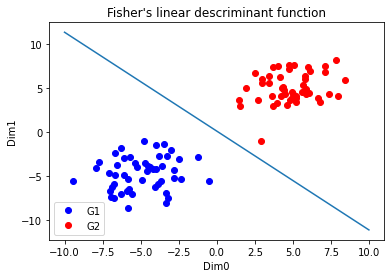

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データの次元数
DIM = 2 

# 共分散
cov = [[3,1],[1,3]]

# 群G1と群2のデータを生成
g1_sample = np.random.multivariate_normal([-5,-5], cov, 50)
g2_sample = np.random.multivariate_normal([5,5], cov, 50)

# 各クラスの平均を算出:
mean1 = np.mean(g1_sample, axis=0)
mean2 = np.mean(g2_sample, axis=0)

# クラス内共分散行列を求める:S
sw = np.zeros((DIM, DIM))
for x1 in g1_sample:
    x1 = x1.reshape(DIM,1)
    mean1 = mean1.reshape(DIM,1)
    sw += np.dot((x1-mean1),(x1-mean1).T)
for x2 in g2_sample:
    x2 = x2.reshape(DIM,1)
    mean2 = mean2.reshape(DIM,1)
    sw += np.dot((x2-mean2),(x2-mean2).T)

# クラス内共分散行列の逆行列:S^(-1)
sw_inv = np.linalg.inv(sw)

# wを求める
w = np.dot(sw_inv,(mean1-mean2))
print(f'w ={w}')

# G1のデータをプロット
x_1,y_1 = g1_sample.T
plt.plot(x_1, y_1, 'bo', label='G1')

# G2のデータをプロット
x_2, y_2 = g2_sample.T
plt.plot(x_2, y_2, 'ro', label='G2')

# 決定境界をプロット
mean = (mean1 + mean2)/2 # 平均値の中点
a = -(w[0]/w[1]) # wと直交する方向が傾きとなる
b = -a*mean[0]+mean[1] # b=-a*x+yより算出
x = np.linspace(-10, 10, 1000)
y = a*x+b
line = (x, y)
plt.plot(line[0], line[1])

plt.title("Fisher's linear descriminant function")
plt.xlabel("Dim0")
plt.ylabel("Dim1")
plt.legend()
plt.show()

# 正準判別分析

サンプルが属する群が2より多い場合の各群の判別においても、各群の平均(重心)となるサンプル$x$とのマハラノビス平方距離を求め、それが最小となる群にサンプルxを分類することで、各群の判別が実行できる。  
**正準判別分析**とは、$g$群の$p$次元データを判別性が高くなるように低次元に射影する方法である。  
フィッシャーの判別分析と同様に群間分散/郡内分散が最大となる$w$を求める。  
正準判別分析のにおいては一般に郡の数が2より多い状況を考えており、複数の射影軸が得られる。  
群間分散/郡内分散により得られる固有ベクトルが射影ベクトルに対応する。

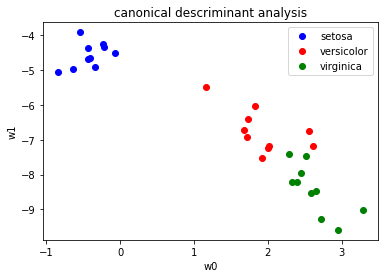

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# irisデータセットで標本分散共分散行列と標本相関行列を表示
iris = load_iris()
iris_df = pd.DataFrame(
        iris.data,
        columns=iris.feature_names,
    )
iris_df['target'] = iris.target

# irisデータで実行
setosa_df = iris_df.loc[iris_df['target']==0]
versi_df = iris_df.loc[iris_df['target']==1]
virgi_df = iris_df.loc[iris_df['target']==2]

# 全データの平均を算出
iris_all_mean = iris_df.iloc[:, 0:4].mean()

# 各群ごとに平均を算出
setosa_mean = setosa_df.iloc[:, 0:4].mean()
versi_mean = versi_df.iloc[:, 0:4].mean()
virgi_mean = versi_df.iloc[:, 0:4].mean()

# 群間変動行列を算出
setosa_div = setosa_mean.to_numpy()-iris_all_mean.to_numpy()
versi_div = versi_mean.to_numpy()-iris_all_mean.to_numpy()
virgi_div = virgi_mean.to_numpy()-iris_all_mean.to_numpy()
s_b = len(setosa_df)*np.dot(setosa_div, setosa_div.T)
s_b += len(versi_df)*np.dot(versi_div, versi_div.T)
s_b += len(virgi_df)*np.dot(virgi_div, virgi_div.T)

# 郡内変動行列を算出
setosa_cov = setosa_df.iloc[:, 0:4].cov()
versi_cov = versi_df.iloc[:, 0:4].cov()
virgi_cov = virgi_df.iloc[:, 0:4].cov()
s_w = len(setosa_df)*setosa_cov
s_w += len(versi_df)*versi_cov
s_w += len(virgi_df)*virgi_cov

# 固有値、固有ベクトルを算出
s_w_inv = np.linalg.inv(s_w)
eigen_result = np.linalg.eig(np.dot(s_w_inv, s_b))
eigen_id = np.argsort(eigen_result[0])[::-1] # 固有値の大きい順にソート
eigen_value = eigen_result[0][eigen_id]
eigen_vector = eigen_result[1][eigen_id]

# 1,2番目に大きい固有値の固有ベクトルで2次元平面にデータを各群10点ずつプロットする
setosa_sample = setosa_df.iloc[:, 0:4].sample(10)
x_1 = []
y_1 = []
for idx, row in setosa_sample.iterrows():
    x_1.append(np.dot(eigen_vector[0].T, row))
    y_1.append(np.dot(eigen_vector[1].T, row))

versi_sample = versi_df.iloc[:, 0:4].sample(10)
x_2 = []
y_2 = []
for idx, row in versi_sample.iterrows():
    x_2.append(np.dot(eigen_vector[0].T, row))
    y_2.append(np.dot(eigen_vector[1].T, row))

virgi_sample = virgi_df.iloc[:, 0:4].sample(10)
x_3 = []
y_3 = []
for idx, row in virgi_sample.iterrows():
    x_3.append(np.dot(eigen_vector[0].T, row))
    y_3.append(np.dot(eigen_vector[1].T, row))

plt.plot(x_1, y_1, 'bo', label='setosa')
plt.plot(x_2, y_2, 'ro', label='versicolor')
plt.plot(x_3, y_3, 'go', label='virginica')

plt.title("canonical descriminant analysis")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend()
plt.show() # 3群をうまく判別することができた

# サポートベクターマシン

**サポートベクターマシン**(**SVM**)は、判別平面と最も近いデータ点の距離(**マージン**)が最大になるように、判別平面(判別軸)を定めることで、未知のデータに対しても高い予測性能を有する線形判別器である。  
判別軸を求める最適化問題は凸最適化問題として定式化され、大域的な解が定まること、そしてカーネル法を利用することで柔軟な非線形判別への拡張が容易であることから、機械学習における代表的な2クラス判別手法として広く用いられている。

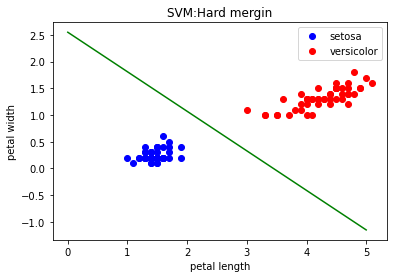

SVMスコア:1.0


In [3]:
# irisデータで実践
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# 目的変数と説明変数に分離
X = iris.data[:100, 2:]
Y = iris.target[:100]

# モデルを作成
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC()
svm.fit(X_train, Y_train)

# 判別関数を描画
line = np.linspace(0, 5)
intercept = svm.intercept_
coef = svm.coef_
plt.plot(X[:50, 0], X[:50, 1], 'bo', label='setosa')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='versicolor')
plt.plot(line, -(line*coef[0][0]+intercept)/coef[0][1], c='g')
plt.title('SVM:Hard mergin')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

print(f"SVMスコア:{svm.score(X_test, Y_test)}")

SVMのマージン最大化という定式化では、全ての学習データが謝りなく線形分離可能であるという仮定を置いていた。  
この仮定を緩和して、線形分離でなくても定義できる**ソフトマージン**最大化によって判別関数を求めることにする。

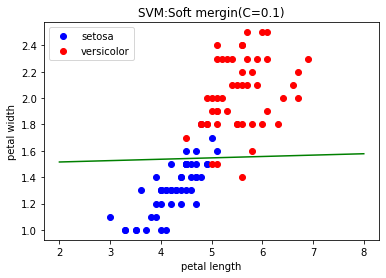

SVMスコア:0.96


In [4]:
# 分離が悪いirisデータを使用して実践
X = iris.data[50:, 2:]
Y = iris.target[50:] - 1

# ソフトマージンパラメータC=0.1で描画
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=0)
svm = LinearSVC(C=0.1)
svm.fit(X_train, Y_train)

# 判別関数を描画
line = np.linspace(2, 8)
intercept = svm.intercept_
coef = svm.coef_
plt.plot(X[:50, 0], X[:50, 1], 'bo', label='setosa')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='versicolor')
plt.plot(line, -(line*coef[0][0]+intercept)/coef[0][1], c='g')
plt.title('SVM:Soft mergin(C=0.1)')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

print(f"SVMスコア:{svm.score(X_test, Y_test)}")

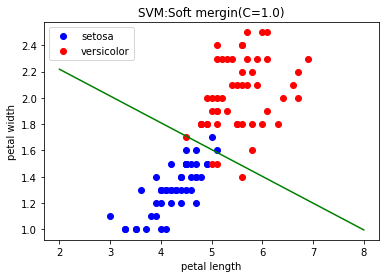

SVMスコア:1.0


In [5]:
# ソフトマージンパラメータC=1.0で描画
svm = LinearSVC(C=1.0)
svm.fit(X_train, Y_train)

# 判別関数を描画
line = np.linspace(2, 8)
intercept = svm.intercept_
coef = svm.coef_
plt.plot(X[:50, 0], X[:50, 1], 'bo', label='setosa')
plt.plot(X[50:, 0], X[50:, 1], 'ro', label='versicolor')
plt.plot(line, -(line*coef[0][0]+intercept)/coef[0][1], c='g')
plt.title('SVM:Soft mergin(C=1.0)')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

print(f"SVMスコア:{svm.score(X_test, Y_test)}")

# 混同行列とROC解析

判別分析において、一般にはクラスラベルごとに判別を誤った際に被る損失は異なる。  
また各クラスのサンプルの比率が大きく偏っている状況では、誤り率を判別性能の指標として用いることは適切でないことがある。  
線形判別、2次半別、SVMなどは、実数値関数$f(x)$の符号$sgn(f(x))$の正負によりサンプル$x$を正例か負例かに分類する方法であるが、クラスラベルに偏りがある場合に対応するため、$t$を閾値として$sgn(f(x)+t)$を用いた判別を考える。  
判別器による判別結果としては以下の4パターンが考えられる。  
　**TP**(**True Positive**)：正例を正しく正例と判別するケース  
　**FP**(**False Positive**)：負例を誤って正例と判別するケース  
　**FN**(**False Negative**)：負例を正しく負例と判別するケース  
　**TN**(**True Negative**)：正例を誤って負例と判別するケース  
これらの値を表にまとめたものを**混同行列**と呼ぶ。

In [6]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"TP:{tp}, FP:{fp}, TN:{tn}, FN:{fn}")

TP:2, FP:4, TN:1, FN:3


TP, FP, FN, TNを用いて判別する様々な尺度が定義されている。  
**正解率**は全サンプルの中で正しく判別できたサンプルの割合であり、
$$
\frac{TP+TN}{TP+FP+FN+TN}
$$
で定義される。

In [7]:
from sklearn.metrics import accuracy_score
print(f"正解率 計算:{(tp+tn)/(tp+fp+fn+tn)}, sklearn関数:{accuracy_score(y_true, y_pred)}")

正解率 計算:0.3, sklearn関数:0.3


**適合率**は、正例と分類されたサンプルのうち実際に正例であるサンプルの割合であり、
$$
\frac{TP}{TP+FP}
$$
で定義される。

In [8]:
from sklearn.metrics import precision_score
print(f"適合率 計算:{tp/(tp+fp)}, sklearn関数:{precision_score(y_true, y_pred)}")

適合率 計算:0.3333333333333333, sklearn関数:0.3333333333333333


**再現率**(**真陽性率、感度**)は、本来は正例と判別するべきサンプルのうち正しく正例と判別できたサンプルの割合であり、
$$
\frac{TP}{TP+FN}
$$
で定義される。

In [9]:
from sklearn.metrics import recall_score
print(f"再現率 計算:{tp/(tp+fn)}, sklearn関数:{recall_score(y_true, y_pred)}")

再現率 計算:0.4, sklearn関数:0.4


**真陰性率**(**特異度**)は、本来は負例と判別するべきサンプルのうち正しく負例と判別できたサンプルの割合であり、
$$
\frac{TN}{TN+FP}
$$
で定義される。

In [10]:
print(f"真陰性率:{tn/(tn+fp)}")

真陰性率:0.2


1-特異度を**偽陽性率**と呼ぶ。

In [11]:
print(f"偽陽性率:{1-tn/(tn+fp)}")

偽陽性率:0.8


一方、閾値の決め方によらない全体的な判別器の性能を評価する方法として、**ROC曲線**がある。  
ROC曲線は閾値$t$を$-\infty$から$\infty$まで変化させた時の真陽性率と偽陽性率を2次元にプロットしたものである。  
ROC曲線は直観的にに判別性能を把握するのに適している。  
定量的に全体的な判別性能を表す指標として、ROC曲線の下側の面積で定義される**AUC**がある。  
1に近いほど判別性能が良いと判断できる。

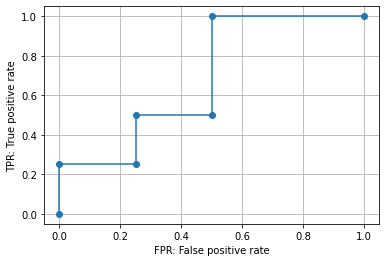

AUC:0.6875


In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_true = [0, 0, 0, 0, 1, 1, 1, 1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]

fpr, tpr, thresholds = roc_curve(y_true, y_score)

# ROC曲線を描画
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate') # 偽陽性率
plt.ylabel('TPR: True positive rate') # 真陽性率
plt.grid()
plt.show()

# AUCを算出
print(f"AUC:{roc_auc_score(y_true, y_score)}")

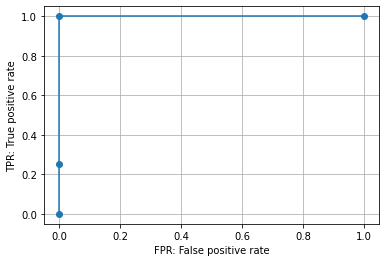

AUC:1.0


In [13]:
# 完全に正確に分類できる閾値が存在する場合(AUCが1の場合)
y_true_perfect = np.array([0, 0, 0, 0, 1, 1, 1, 1])
y_score_perfect = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

fpr, tpr, thresholds = roc_curve(y_true_perfect, y_score_perfect)

# ROC曲線を描画
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate') # 偽陽性率
plt.ylabel('TPR: True positive rate') # 真陽性率
plt.grid()
plt.show()

print(f"AUC:{roc_auc_score(y_true_perfect, y_score_perfect)}")